In [3]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *


import scipy


In [3]:
FEATURE_DIMS = ["Color", "Shape", "Pattern"]
PRE_INTERVAL = 1000
POST_INTERVAL = 1000
INTERVAL_SIZE = 100
SMOOTH = 1
EVENT = "StimOnset"
OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"
# path to a dataframe of sessions to analyze

### Combine across different samples

In [4]:
within_dim_accs = []
across_dim_accs = []
for i in range(8):
    within_dim_acc = np.load(os.path.join(OUTPUT_DIR, f"ccgp_confidence_seed_{i}_within_dim_accs.npy"))
    across_dim_acc = np.load(os.path.join(OUTPUT_DIR, f"ccgp_confidence_seed_{i}_across_dim_accs.npy"))
    within_dim_accs.append(within_dim_acc)
    across_dim_accs.append(across_dim_acc)
within_dim_accs = np.hstack(within_dim_accs)
across_dim_accs = np.hstack(across_dim_accs)


Text(0, 0.5, 'Decoder Accuracy')

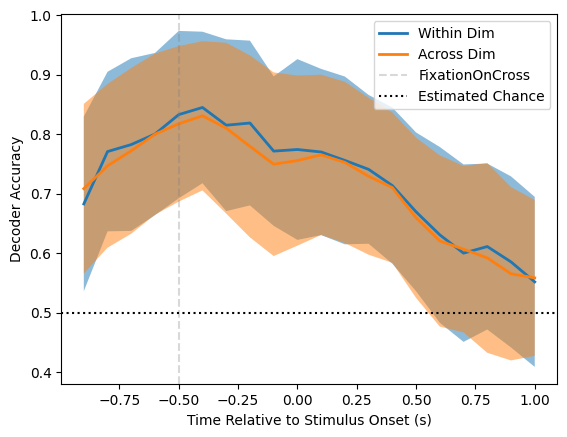

In [8]:
fig, ax = plt.subplots()
visualization_utils.visualize_accuracy_across_time_bins(
    within_dim_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Within Dim",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    across_dim_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Across Dim",
    right_align=True, 
)

# # add grey band for selection period
# ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add dotted line for feedback start
ax.axvline(-0.5, alpha=0.3, color='gray', linestyle='dashed', label="FixationOnCross")
# # add estimated chance
ax.axhline(1/2, color='black', linestyle='dotted', label="Estimated Chance")
ax.legend()
ax.set_xlabel("Time Relative to Stimulus Onset (s)")
ax.set_ylabel("Decoder Accuracy")

### What if filtering first then label

In [10]:
within_dim_accs = []
across_dim_accs = []
within_dim_accs_filt_first = []
across_dim_accs_filt_first = []
for i in range(8):
    within_dim_acc = np.load(os.path.join(OUTPUT_DIR, f"ccgp_confidence_seed_{i}_within_dim_accs.npy"))
    across_dim_acc = np.load(os.path.join(OUTPUT_DIR, f"ccgp_confidence_seed_{i}_across_dim_accs.npy"))
    within_dim_acc_filt_first = np.load(os.path.join(OUTPUT_DIR, f"ccgp_confidence_label_after_filter_seed_{i}_within_dim_accs.npy"))
    across_dim_acc_filt_first = np.load(os.path.join(OUTPUT_DIR, f"ccgp_confidence_label_after_filter_seed_{i}_across_dim_accs.npy"))
    within_dim_accs.append(within_dim_acc)
    across_dim_accs.append(across_dim_acc)
    within_dim_accs_filt_first.append(within_dim_acc_filt_first)
    across_dim_accs_filt_first.append(across_dim_acc_filt_first)
within_dim_accs = np.hstack(within_dim_accs)
across_dim_accs = np.hstack(across_dim_accs)
within_dim_accs_filt_first = np.hstack(within_dim_accs_filt_first)
across_dim_accs_filt_first = np.hstack(across_dim_accs_filt_first)


Text(0, 0.5, 'Decoder Accuracy')

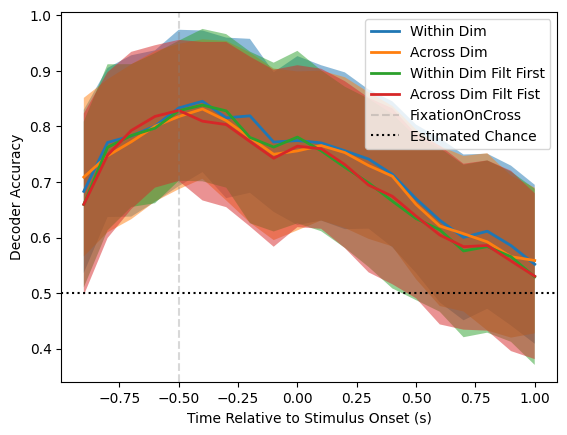

In [11]:
fig, ax = plt.subplots()
visualization_utils.visualize_accuracy_across_time_bins(
    within_dim_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Within Dim",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    across_dim_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Across Dim",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    within_dim_accs_filt_first,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Within Dim Filt First",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    across_dim_accs_filt_first,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Across Dim Filt Fist",
    right_align=True, 
)

# # add grey band for selection period
# ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add dotted line for feedback start
ax.axvline(-0.5, alpha=0.3, color='gray', linestyle='dashed', label="FixationOnCross")
# # add estimated chance
ax.axhline(1/2, color='black', linestyle='dotted', label="Estimated Chance")
ax.legend()
ax.set_xlabel("Time Relative to Stimulus Onset (s)")
ax.set_ylabel("Decoder Accuracy")

### Look at overall confidence decodability
- across all trials, balanced
- subsampled randomly, 
- subsampling attended to trials only

In [4]:
res_dict = {}
for mode in ["all", "subsample_attention", "subsample_random"]:
    accs = []
    for i in range(8):
        acc = np.load(os.path.join(OUTPUT_DIR, f"ccgp_confidence_overall_{mode}_seed_{i}_test_accs.npy"))
        accs.append(acc)
    accs = np.hstack(accs)
    res_dict[mode] = accs

Text(0, 0.5, 'Decoder Accuracy')

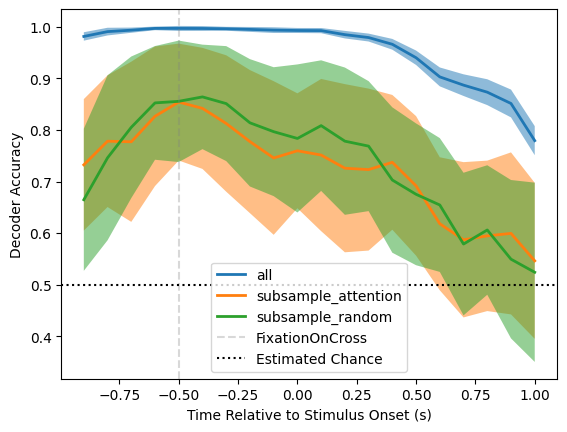

In [5]:
fig, ax = plt.subplots()
for mode in ["all", "subsample_attention", "subsample_random"]:
    accs = res_dict[mode]
    visualization_utils.visualize_accuracy_across_time_bins(
        accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=mode,
        right_align=True, 
    )

# # add grey band for selection period
# ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add dotted line for feedback start
ax.axvline(-0.5, alpha=0.3, color='gray', linestyle='dashed', label="FixationOnCross")
# # add estimated chance
ax.axhline(1/2, color='black', linestyle='dotted', label="Estimated Chance")
ax.legend()
ax.set_xlabel("Time Relative to Stimulus Onset (s)")
ax.set_ylabel("Decoder Accuracy")

### During FB period

In [6]:
FEATURE_DIMS = ["Color", "Shape", "Pattern"]
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
SMOOTH = 1
EVENT = "FeedbackOnset"
OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"
# path to a dataframe of sessions to analyze

In [15]:
names = ["within_dim", "across_dim", "next_trial_conf_within_dim", "next_trial_conf_across_dim"]
res_dict = {}
for name in names: 
    accs = []
    for i in range(8):
        acc = np.load(os.path.join(OUTPUT_DIR, f"ccgp_confidence_{EVENT}_{i}_{name}_accs.npy"))
        accs.append(acc)
    accs = np.hstack(accs)
    res_dict[name] = accs

Text(0, 0.5, 'Decoder Accuracy')

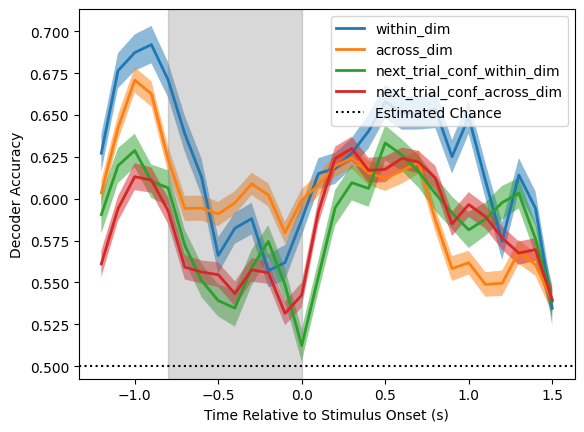

In [16]:
fig, ax = plt.subplots()
for name in names: 
    accs = res_dict[name]
    visualization_utils.visualize_accuracy_across_time_bins(
        accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=name,
        right_align=True, 
        sem=True,
    )

# # add grey band for selection period
# ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add dotted line for feedback start
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# # add estimated chance
ax.axhline(1/2, color='black', linestyle='dotted', label="Estimated Chance")
ax.legend()
ax.set_xlabel("Time Relative to Stimulus Onset (s)")
ax.set_ylabel("Decoder Accuracy")